# Data Exploration and Analysis 

### EV Station Data

In [140]:
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
# Load the EV stations dataset
ev_stations_df = pd.read_csv('EV stations data.csv')

In [6]:
ev_stations_df.head()

,OBJECTID,Type,STYLE,MeterNumber,RatePerHour,MaxTime,MapSymbol,Description,InfrastructureID,LifecycleStatus,...,Location,CivicAddress,Comments,Owner,OwnerNotes,Custodian,CustodianNotes,geometry,Latitude,Longitude
0,19,non-metered,ELECTRIC VEHICLE,NaN,Regular parking fees apply.,NaN,ELECTRIC VEHICLE,Ver Network AAA-272 View Street Parkade. Regul...,PSP002216,ACT,...,NaN,NaN,NaN,VC,NaN,VC,NaN,POINT (-123.3638054044696 48.42511956618813),48.424600,-123.361093
1,197,non-metered,ELECTRIC VEHICLE,NaN,Free,NaN,ELECTRIC VEHICLE,Hillside Mall Rooftop (approximate location),PSP002223,ACT,...,NaN,NaN,NaN,VC,NaN,VC,NaN,POINT (-123.33506163541432 48.44690464482426),48.446989,-123.334368
2,430,non-metered,ELECTRIC VEHICLE,NaN,Free,NaN,ELECTRIC VEHICLE,Hillside Mall Rooftop (approximate location),PSP002225,ACT,...,NaN,NaN,NaN,VC,NaN,VC,NaN,POINT (-123.33499999346992 48.44683484227543),48.442372,-123.331238
3,529,metered,ELECTRIC VEHICLE,2518.0,$3.00,90 MIN,ELECTRIC VEHICLE,$3.00/HR 90 MIN MAX. Regular parking fees app...,PSP000511,ACT,...,NaN,NaN,NaN,VC,Public Use,VC,Facilities,POINT (-123.36636785301413 48.425932381530174),48.422837,-123.367715
4,778,metered,ELECTRIC VEHICLE,4001.0,$3.00,40 MIN,ELECTRIC VEHICLE,$3.00/HR 40 MIN MAX. Regular parking fees appl...,PSP000629,ACT,...,NaN,NaN,NaN,VC,NaN,VC,NaN,POINT (-123.36964991148943 48.42796548598136),48.429492,-123.368619


In [7]:
ev_stations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   OBJECTID                    300 non-null    int64  
 1   Type                        300 non-null    object 
 2   STYLE                       300 non-null    object 
 3   MeterNumber                 94 non-null     float64
 4   RatePerHour                 300 non-null    object 
 5   MaxTime                     94 non-null     object 
 6   MapSymbol                   300 non-null    object 
 7   Description                 300 non-null    object 
 8   InfrastructureID            300 non-null    object 
 9   LifecycleStatus             300 non-null    object 
 10  Condition                   10 non-null     float64
 11  HoursInEffect               94 non-null     object 
 12  Length_m                    10 non-null     float64
 13  Width_m                     10 non-

In [8]:
ev_stations_df.describe()

,OBJECTID,MeterNumber,Condition,Length_m,Width_m,AccessAisleWidth_m,CrossSlope_percent,Latitude,Longitude
count,300.000000,94.000000,10.0,10.0,10.0,10.0,1.000000e+01,300.000000,300.000000
mean,1386.586667,3708.680851,2.0,5.0,3.0,2.5,8.000000e-01,48.434801,-123.353294
std,617.704286,2011.297582,0.0,0.0,0.0,0.0,1.170278e-16,0.010835,0.015769
min,19.000000,2517.000000,2.0,5.0,3.0,2.5,8.000000e-01,48.418847,-123.374624
25%,911.000000,2760.000000,2.0,5.0,3.0,2.5,8.000000e-01,48.425158,-123.366514
50%,1419.000000,2915.000000,2.0,5.0,3.0,2.5,8.000000e-01,48.429905,-123.361679
75%,1896.000000,4001.000000,2.0,5.0,3.0,2.5,8.000000e-01,48.446401,-123.335721
max,2330.000000,9292.000000,2.0,5.0,3.0,2.5,8.000000e-01,48.452174,-123.329817


In [9]:
# Clean and convert to GeoDataFrame
ev_stations_df_clean = ev_stations_df.dropna(subset=['Latitude', 'Longitude'])
geometry = [Point(xy) for xy in zip(ev_stations_df_clean['Longitude'], ev_stations_df_clean['Latitude'])]
ev_gdf = gpd.GeoDataFrame(ev_stations_df_clean, geometry=geometry, crs='EPSG:4326')

<Figure size 1000x800 with 0 Axes>

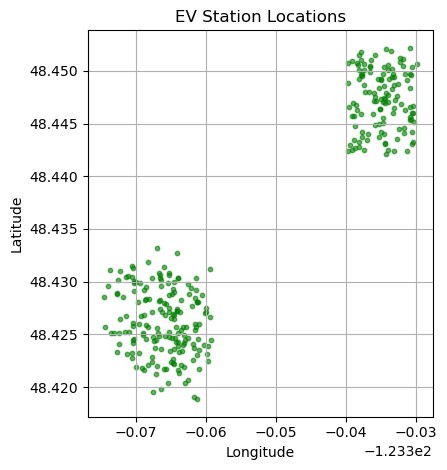

In [127]:
# Plot map of stations
plt.figure(figsize=(10, 8))
ev_gdf.plot(markersize=10, alpha=0.6, color='green')
plt.title('EV Station Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()

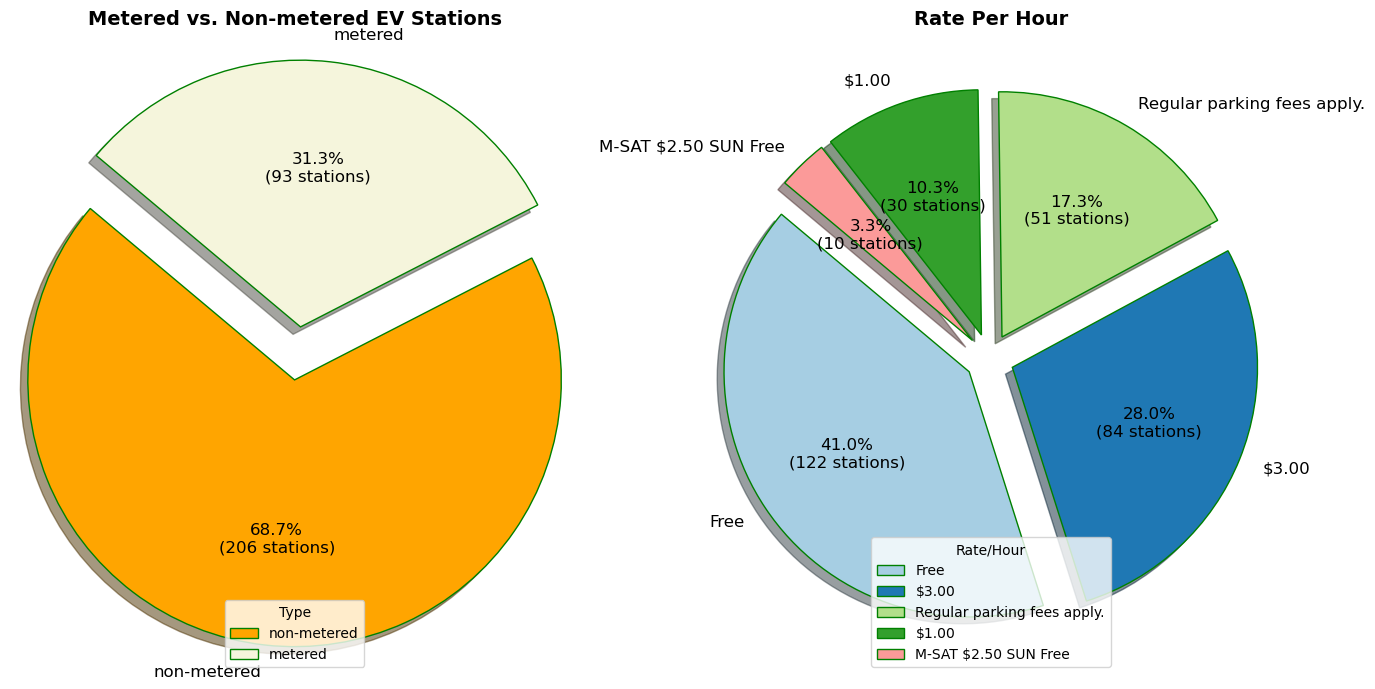

In [29]:
# Count metered vs non-metered stations 
type_counts = ev_stations_df['Type'].value_counts()
types = type_counts.index
sizes1 = type_counts.values

explode1 = (0.1, 0.1)
colors1 = ("orange", "beige")
wp = {'linewidth': 1, 'edgecolor': 'green'}

# ----- Pie Chart 2: RatePerHour Distribution -----
rate_counts = ev_stations_df['RatePerHour'].value_counts()
rates = rate_counts.index
sizes2 = rate_counts.values
explode2 = [0.1] * len(rates)
colors2 = plt.cm.Paired.colors[:len(rates)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Pie 1: Type
wedges1, texts1, autotexts1 = ax1.pie(
    sizes1,
    explode=explode1,
    labels=types,
    colors=colors1,
    autopct=lambda p: f'{p:.1f}%\n({int(p*sum(sizes1)/100)} stations)',
    startangle=140,
    shadow=True,
    wedgeprops=wp,
    textprops=dict(color="black", fontsize=12)
)
ax1.set_title("Metered vs. Non-metered EV Stations", fontsize=14, weight='bold')
ax1.axis('equal')
ax1.legend(wedges1, types, title="Type", loc="lower center")

# Pie 2: RatePerHour
wedges2, texts2, autotexts2 = ax2.pie(
    sizes2,
    explode=explode2,
    labels=rates,
    colors=colors2,
    autopct=lambda p: f'{p:.1f}%\n({int(p*sum(sizes2)/100)} stations)',
    startangle=140,
    shadow=True,
    wedgeprops=wp,
    textprops=dict(color="black", fontsize=12)
)
ax2.set_title("Rate Per Hour", fontsize=14, weight='bold')
ax2.axis('equal')
ax2.legend(wedges2, rates, title="Rate/Hour", loc="lower center")

# Layout adjustment
plt.tight_layout()
plt.show()

### Traffic Data

In [79]:
traffic_df = pd.read_csv('Traffic data.csv') 
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OBJECTID      1775 non-null   int64  
 1   Label         1774 non-null   object 
 2   Direction     1774 non-null   object 
 3   SHAPE_Length  1775 non-null   float64
 4   Year          1774 non-null   object 
 5   PDF           810 non-null    object 
 6   geometry      1775 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 97.2+ KB


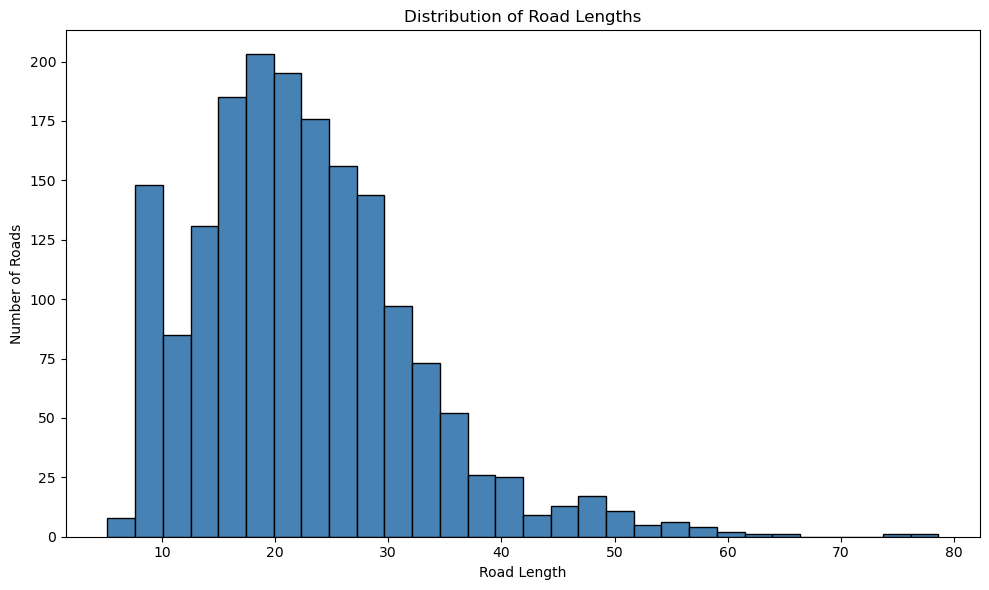

In [91]:
plt.figure(figsize=(10, 6))
plt.hist(traffic_df['SHAPE_Length'], bins=30, color='steelblue', edgecolor='black')
plt.title('Distribution of Road Lengths')
plt.xlabel('Road Length')
plt.ylabel('Number of Roads')
plt.tight_layout()
plt.show()


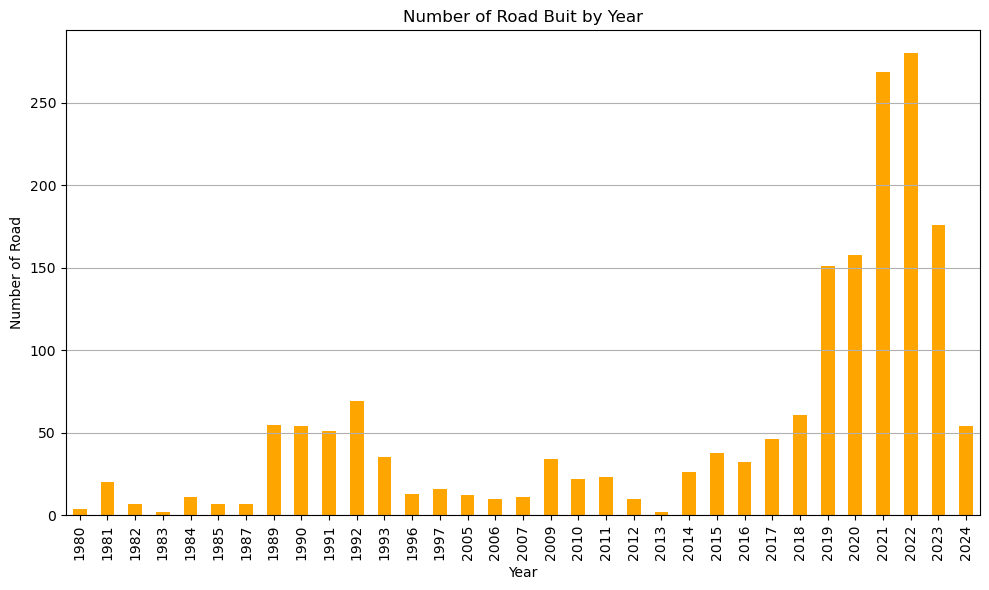

In [93]:
traffic_df['Year'] = traffic_df['Year'].astype(str)
traffic_df['Year_Clean'] = traffic_df['Year'].str.extract(r'(\d{4})')

year_counts = traffic_df['Year_Clean'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar', color='orange')
plt.title('Number of Road Buit by Year')
plt.xlabel('Year')
plt.ylabel('Number of Road')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

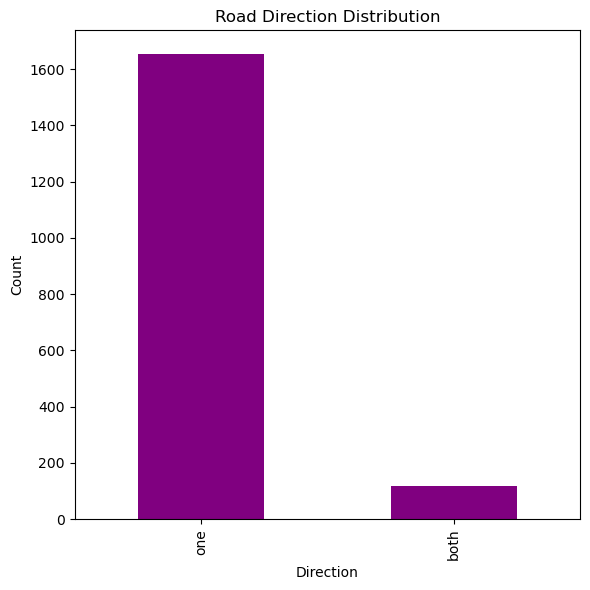

In [100]:
direction_counts = traffic_df['Direction'].value_counts()

plt.figure(figsize=(6, 6))
direction_counts.plot(kind='bar', color='purple')
plt.title('Road Direction Distribution')
plt.xlabel('Direction')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


### Weather Data

In [112]:
weather_df = pd.read_csv('Weather data.csv') 
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          730 non-null    object 
 1   NAME             730 non-null    object 
 2   LATITUDE         730 non-null    float64
 3   LONGITUDE        730 non-null    float64
 4   ELEVATION        730 non-null    float64
 5   DATE             730 non-null    object 
 6   PRCP             730 non-null    float64
 7   PRCP_ATTRIBUTES  730 non-null    object 
 8   TAVG             730 non-null    float64
 9   TAVG_ATTRIBUTES  730 non-null    object 
 10  TMAX             730 non-null    float64
 11  TMAX_ATTRIBUTES  730 non-null    object 
 12  TMIN             730 non-null    float64
 13  TMIN_ATTRIBUTES  730 non-null    object 
dtypes: float64(7), object(7)
memory usage: 80.0+ KB


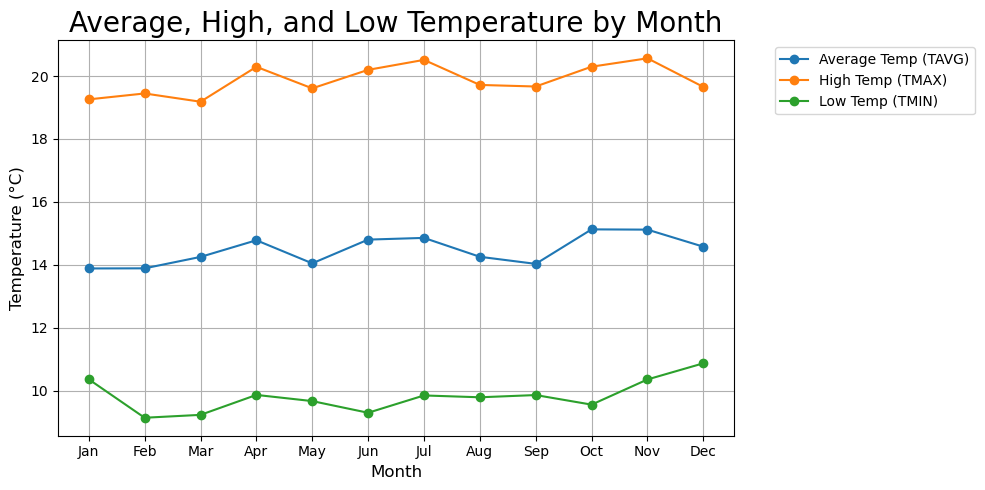

In [192]:
weather_df["DATE"] = pd.to_datetime(weather_df["DATE"])
weather_df["Month"] = weather_df["DATE"].dt.month
weather_df["Month"] = weather_df["Month"].astype(int)

monthly_temp = (
    weather_df
    .groupby("Month")[["TAVG", "TMAX", "TMIN"]]
    .mean()
    .sort_index()
)

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(10, 5))
plt.plot(month_labels, monthly_temp["TAVG"], marker="o", label="Average Temp (TAVG)")
plt.plot(month_labels, monthly_temp["TMAX"], marker="o", label="High Temp (TMAX)")
plt.plot(month_labels, monthly_temp["TMIN"], marker="o", label="Low Temp (TMIN)")

plt.title("Average, High, and Low Temperature by Month", size="20")
plt.xlabel("Month", size="12")
plt.ylabel("Temperature (°C)", size="12")
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.show()
